In [1]:
import pandas as pd
import numpy as np

In [3]:
ksl=pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\pydata\kenya_primary_schools.csv')

In [4]:
ksl.head(5)

,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,Type3,...,OthersF,NoTeaching,NonTeachin,Province,District,Division,Location,Costituenc,Latitude,Longitude
0,36.14,0.27,10001,CHEBIREBEI PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.27,36.14
1,36.17,0.26,10002,WASEGES PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.26,36.17
2,36.18,0.24,10003,KIRIBOT PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.24,36.18
3,36.19,0.21,10004,KABUSWO PRI SCH,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,2.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.21,36.19
4,37.70,-0.88,10005,VONDENI PRI SCHOOL,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,EASTERN,MACHAKOS,MASINGA,KIVAA,MASINGA,-0.88,37.70


In [5]:
ksl.columns

Index(['X', 'Y', 'FID', 'Name_of_Sc', 'Level_', 'Status', 'SchSponsor',
       'Type1', 'Type2', 'Type3', 'PupilTeach', 'ClassrmRat', 'ToiletRati',
       'No_Classrm', 'BoysToilet', 'GirlsToilet', 'TeachersTo', 'TotalToile',
       'TotalBoys', 'TotalGirls', 'TotalEnrol', 'GO_KTSC_M', 'GOK_TSC_F',
       'authorityM', 'authorityF', 'PTA_BOG_M', 'PTA_BOG_F', 'OthersM',
       'OthersF', 'NoTeaching', 'NonTeachin', 'Province', 'District',
       'Division', 'Location', 'Costituenc', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
ksl.columns=ksl.columns.str.lower().str.replace(' ', '_')
ksl.columns

Index(['x', 'y', 'fid', 'name_of_sc', 'level_', 'status', 'schsponsor',
       'type1', 'type2', 'type3', 'pupilteach', 'classrmrat', 'toiletrati',
       'no_classrm', 'boystoilet', 'girlstoilet', 'teachersto', 'totaltoile',
       'totalboys', 'totalgirls', 'totalenrol', 'go_ktsc_m', 'gok_tsc_f',
       'authoritym', 'authorityf', 'pta_bog_m', 'pta_bog_f', 'othersm',
       'othersf', 'noteaching', 'nonteachin', 'province', 'district',
       'division', 'location', 'costituenc', 'latitude', 'longitude'],
      dtype='object')

In [8]:
ksl.isnull().sum()

x              0
y              0
fid            0
name_of_sc     1
level_         1
status         1
schsponsor     1
type1          1
type2          1
type3          1
pupilteach     1
classrmrat     1
toiletrati     1
no_classrm     1
boystoilet     1
girlstoilet    1
teachersto     1
totaltoile     1
totalboys      1
totalgirls     1
totalenrol     1
go_ktsc_m      1
gok_tsc_f      1
authoritym     1
authorityf     1
pta_bog_m      1
pta_bog_f      1
othersm        1
othersf        1
noteaching     1
nonteachin     1
province       1
district       1
division       1
location       1
costituenc     1
latitude       1
longitude      1
dtype: int64

<Axes: >

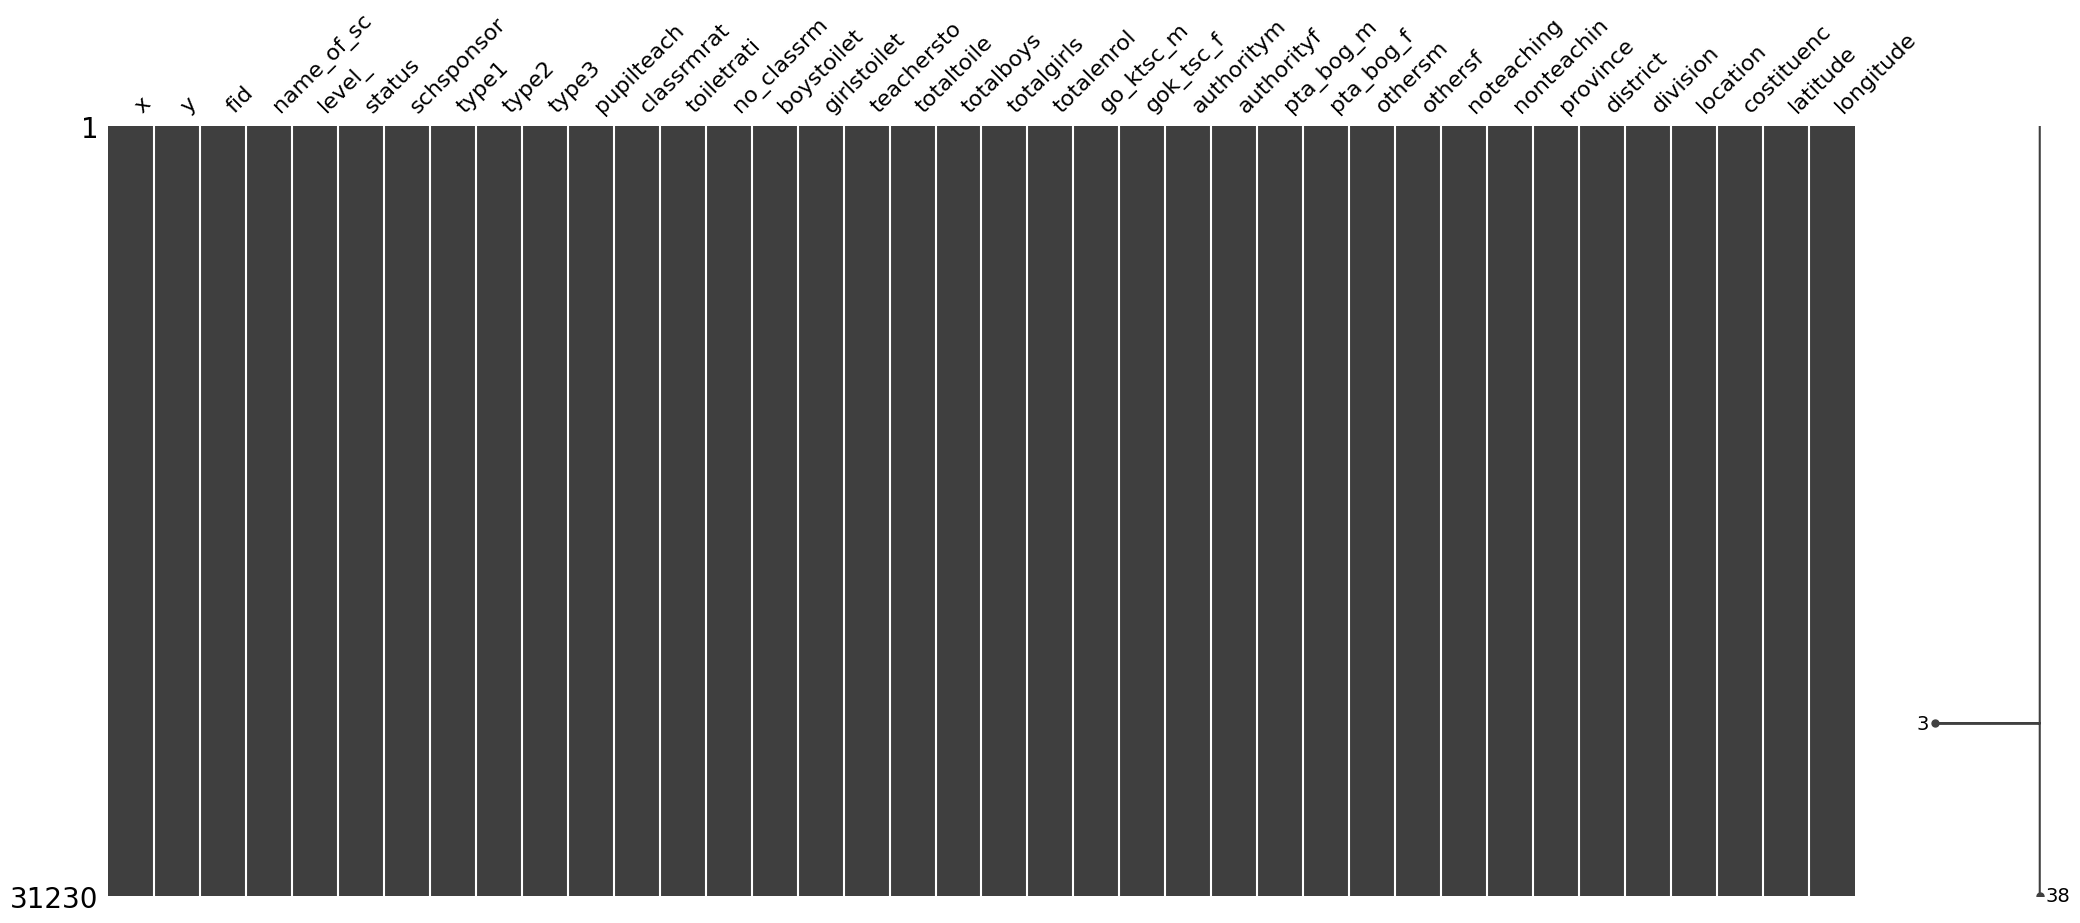

In [9]:
import missingno as msno
msno.matrix(ksl)


In [10]:
ksl.dropna(inplace=True)

In [11]:
ksl.isnull().sum()

x              0
y              0
fid            0
name_of_sc     0
level_         0
status         0
schsponsor     0
type1          0
type2          0
type3          0
pupilteach     0
classrmrat     0
toiletrati     0
no_classrm     0
boystoilet     0
girlstoilet    0
teachersto     0
totaltoile     0
totalboys      0
totalgirls     0
totalenrol     0
go_ktsc_m      0
gok_tsc_f      0
authoritym     0
authorityf     0
pta_bog_m      0
pta_bog_f      0
othersm        0
othersf        0
noteaching     0
nonteachin     0
province       0
district       0
division       0
location       0
costituenc     0
latitude       0
longitude      0
dtype: int64

In [14]:
# Calculate the average enrolment per province
avg_enroll_per_province = ksl.groupby('province')['totalenrol'].mean()
print("Average enrollment per province:", avg_enroll_per_province.round(2))


Average enrollment per province: province
CENTRAL          292.86
COAST            388.62
Central           58.00
EASTERN          283.87
NAIROBI          269.99
NORTH EASTERN    251.75
NYANZA           290.57
RIFT VALLEY      304.92
WESTERN          458.65
Name: totalenrol, dtype: float64


In [19]:
# Find the province with the highest average enrolment
highest_enroll_province=avg_enroll_per_province.idxmax()
print('Province with highest enrollment is :',highest_enroll_province)

Province with highest enrollment is : WESTERN


In [35]:
# Schools in Coast province most in need of classrooms
coast_schools = ksl[ksl['province'] == 'COAST'].groupby('province')['no_classrm'].sum()
coast_schools

province
COAST    15192.0
Name: no_classrm, dtype: float64

In [ ]:
# Schools in Coast province most in need of classrooms 
coast_schools_need_classrooms = ksl[ksl['province'] == 'COAST'].nsmallest(7, 'no_classrm')
coast_schools_need_classrooms[['name_of_sc', 'no_classrm']]

,name_of_sc,no_classrm
3012,KACHORORONI PRI,0.0
3043,NDIGIRIA PRI,0.0
3044,SITA HIDDEN ACADEMY,0.0
3049,MIRIHINI PRI,0.0
3051,CHURCH OF CHRIST SCH,0.0
3110,ONKOLDE PRIMARY,0.0
3137,SERA PRIMARY SCH,0.0


In [32]:
# Schools in Rift Valley most in need of sanitation for teachers
rift_valley_sanitation_teachers = ksl[ksl['province'] == 'RIFT VALLEY'].nsmallest(5, 'teachersto')
rift_valley_sanitation_teachers[['name_of_sc', 'teachersto']]


,name_of_sc,teachersto
7,KABERGEI PRI,0.0
97,EMMANUEL ACADEMY PRI SCH,0.0
115,ARAMA PRI,0.0
136,NARONYO PRI,0.0
156,KINGS JUNIOR PRI,0.0


In [33]:
# Schools in Central most in need of sanitation for students
central_sanitation_students = ksl[ksl['province'] == 'CENTRAL'].nsmallest(5, 'totaltoile')
central_sanitation_students[['name_of_sc', 'totaltoile']]

,name_of_sc,totaltoile
2112,KINOO PRIMARY,0.0
2115,SUENI JUNIOR ACEDEMY PRIMARY,0.0
2117,SOON BIG BRAIN ACADEMY PRI,0.0
2119,JEDDY VISION PRI,0.0
2121,SATHYA SAI PRIMARY SCHOOL,0.0


In [41]:
# District in Nairobi County with highest number of schools
nairobi_data = ksl[ksl['province'] == 'NAIROBI']  

#  Group by district and count unique school names  
nairobi_district_counts = nairobi_data.groupby('district')['name_of_sc'].nunique()  

# Find the district with the highest number of unique school names  
highest_schools_district = nairobi_district_counts.idxmax()  
  
print("District in Nairobi with highest number of schools:\n", highest_schools_district)  

District in Nairobi with highest number of schools:
 NAIROBI


In [42]:
# Average pupil-teacher ratio by sponsorship type in Nairobi
pupil_teacher_ratio = ksl[ksl['province'] == 'NAIROBI'].groupby('schsponsor')['pupilteach'].mean().round(2)
pupil_teacher_ratio


schsponsor
                               0.00
CENTRAL GOVERNMENT/DEB        34.59
COMMUNITY                     21.80
LOCAL GOVERNMENT AUTHORITY    41.67
NGO/CBO                       19.21
PRIVATE INDIVIDUAL            10.86
RELIGIOUS ORGANIZATION        16.03
Name: pupilteach, dtype: float64

In [43]:
ksl['total_school_staff']=ksl['noteaching']+ ksl['nonteachin']
ksl.columns

Index(['x', 'y', 'fid', 'name_of_sc', 'level_', 'status', 'schsponsor',
       'type1', 'type2', 'type3', 'pupilteach', 'classrmrat', 'toiletrati',
       'no_classrm', 'boystoilet', 'girlstoilet', 'teachersto', 'totaltoile',
       'totalboys', 'totalgirls', 'totalenrol', 'go_ktsc_m', 'gok_tsc_f',
       'authoritym', 'authorityf', 'pta_bog_m', 'pta_bog_f', 'othersm',
       'othersf', 'noteaching', 'nonteachin', 'province', 'district',
       'division', 'location', 'costituenc', 'latitude', 'longitude',
       'total_school_staff'],
      dtype='object')

In [45]:
# Create pivot table for average classrooms and enrolment by Province and District
pivot_table = ksl.pivot_table(values=['no_classrm', 'totalenrol'], index=['province', 'district'], aggfunc='mean')
pivot_table

no_classrm  totalenrol
province district                         
CENTRAL  KIAMBU      11.300000  305.573585
         KIRINYAGA   10.802564  283.541026
         MARAGUA     12.696970  373.872054
         MURANGA     11.509615  282.041667
         NYANDARUA   10.836518  314.505308
...                        ...         ...
WESTERN  KAKAMEGA     9.945652  448.580435
         LUGARI      10.386243  446.079365
         MT ELGON     7.617450  247.134228
         TESO         9.131034  455.144828
         VIHIGA      10.875949  416.508861

[72 rows x 2 columns]